## UNET parameter equation

In [2]:
def calculateUNETParameters(cd, cp, A, N):
    """
    
    :param cd: kernel size in convs
    :param cp: kernel size in pooling
    :param A: activation maps
    :param N: layers
    :return: 
    """
    encoder = ((2**(2*N-1)-1)*A**2+A)*cd**3 + 2*(2**N-1)*A
    print('encoder : ' + str(encoder))
    decoder_convs = cd**3*(4**(N-1)-1)*A**2 + 2*(2**(N-1)-1)*A
    print('decoder_convs : ' + str(decoder_convs))
    decoder_upconvs = cp**3*A**2*((1/6)*(4**(N)-4)) + (2**(N-1)-1) * A
    print('decoder_upconvs : ' + str(decoder_upconvs))
    decoder = decoder_convs + decoder_upconvs + A + 1
    print('decoder : ' + str(decoder))

    return encoder + decoder

## Jiaming net

In [3]:
calculateUNETParameters(3,2,16,4)

encoder : 878736
decoder_convs : 435680
decoder_upconvs : 86128.0
decoder : 521825.0


1400561.0

## DeepNet

In [4]:
calculateUNETParameters(3,2,16,5)

encoder : 3533456
decoder_convs : 1763040
decoder_upconvs : 348400.0
decoder : 2111457.0


5644913.0

# Bigger Kernel

In [5]:
calculateUNETParameters(5,2,8,4)

encoder : 1017240
decoder_convs : 504112
decoder_upconvs : 21560.0
decoder : 525681.0


1542921.0

# Deep but approx same params

In [6]:
calculateUNETParameters(3,2,8,5)

encoder : 883720
decoder_convs : 440880
decoder_upconvs : 87160.0
decoder : 528049.0


1411769.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

encoder : [    480   33008  260704  878736 2082272 4066480]
decoder_convs : [    224   16352  129248  435680 1032416 2016224]
decoder_upconvs : 86128.0
decoder : [  86369.  102497.  215393.  521825. 1118561. 2102369.]
encoder : [  48912  214928  878736 3533456]
decoder_convs : [  20768  103776  435680 1763040]
decoder_upconvs : [  4112.  20528.  86128. 348400.]
decoder : [  24897.  124321.  521825. 2111457.]
encoder : [  878736  3513120  7903152 14048832 21950160]
decoder_convs : [  435680  1742272  3919776  6968192 10887520]
decoder_upconvs : [  86128.  344288.  774480. 1376704. 2150960.]
decoder : [  521825.  2086593.  4694305.  8344961. 13038561.]


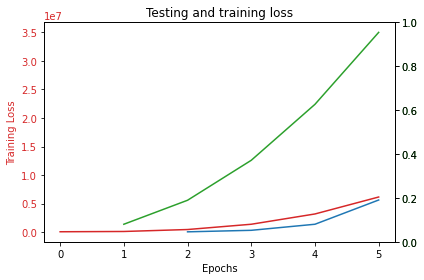

In [23]:
fig, ax1 = plt.subplots()

colour1 = 'tab:red'
ax1.set_title('Testing and training loss')
ax1.set_xlabel('Epochs')
ax1.plot(np.arange(0, 6), calculateUNETParameters(np.arange(0, 6),2,16,4)
, label='training loss', color=colour1)
ax1.tick_params(axis='y', labelcolor=colour1)
ax1.set_ylabel('Training Loss', color=colour1)

ax2 = ax1.twinx()
colour2 = 'tab:blue'
ax1.plot(np.arange(2, 6), calculateUNETParameters(3,2,16,np.arange(2, 6))
, label='training loss', color=colour2)
ax2.tick_params(axis='y', labelcolor=colour2)

ax3 = ax1.twinx()
colour2 = 'tab:green'
ax1.plot(np.arange(1, 6), calculateUNETParameters(3,2,np.arange(1, 6)*16,4)
, label='training loss', color=colour2)
ax2.tick_params(axis='y', labelcolor=colour2)

fig.tight_layout()
plt.show()